In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


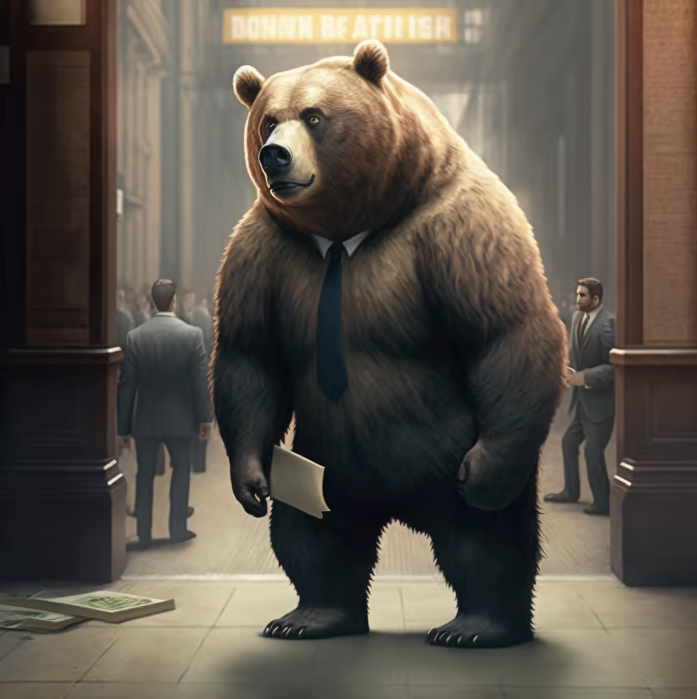
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (12 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
 ### WRITE YOUR CODE ###
df = pd.read_csv("C:\Repositories\CS210\Homework_3\loans.csv")

#dropping the irrelevant column
### WRITE YOUR CODE ###
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#check each feature for missing values and handle them 
### WRITE YOUR CODE ###
df = df.fillna(0)
df = df.drop('Loan_Purpose', axis=1, errors='ignore')
df.info()

#checking num_duplicates
### WRITE YOUR CODE ###
print("------------------------------------------------")
num_duplicates = df.loc[df.duplicated() == True].shape[0]
print("Number of duplicated rows is: " + str(num_duplicates))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2500 non-null   float64
 1   Amount_Requested                2500 non-null   int64  
 2   Amount_Funded_By_Investors      2500 non-null   float64
 3   Interest_Rate                   2500 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   Home_Ownership                  2500 non-null   object 
 7   Monthly_Income                  2500 non-null   float64
 8   Open_CREDIT_Lines               2500 non-null   int64  
 9   Revolving_CREDIT_Balance        2500 non-null   int64  
 10  Inquiries_in_the_Last_6_Months  2500 non-null   int64  
 11  Employment_Length               2500 non-null   float64
dtypes: float64(7), int64(4), object(1)

Check the data types for each feature and convert two features that need to be represented as integers from 'object' to int'.

In [2]:
df.dtypes

ID                                float64
Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [171]:
#type conversion
### WRITE YOUR CODE ###

## Exploratory Data Analysis (15 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



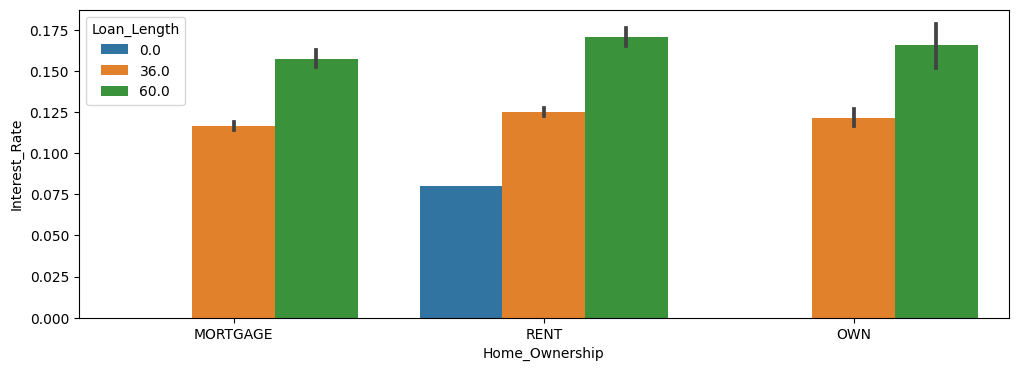

In [3]:
### WRITE YOUR CODE ###
plt.figure(figsize=(12, 4))
sns.barplot(x='Home_Ownership', y='Interest_Rate', hue='Loan_Length', data=df)
plt.show()

Create a pie plot to demonstrate the share of distribution in home ownership.

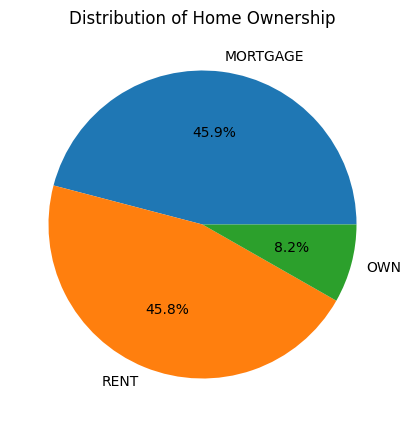

In [4]:
### WRITE YOUR CODE ###
# Count the occurrences of each category in Home_Ownership column
home_ownership_counts = df['Home_Ownership'].value_counts()

# Create a pie plot
plt.figure(figsize=(10,5))
plt.pie(home_ownership_counts, labels = home_ownership_counts.index, autopct='%1.1f%%')

# Title of the plot
plt.title('Distribution of Home Ownership')

# Display the plot
plt.show()

Create a heatmap to present the relationships between different features.

<Axes: >

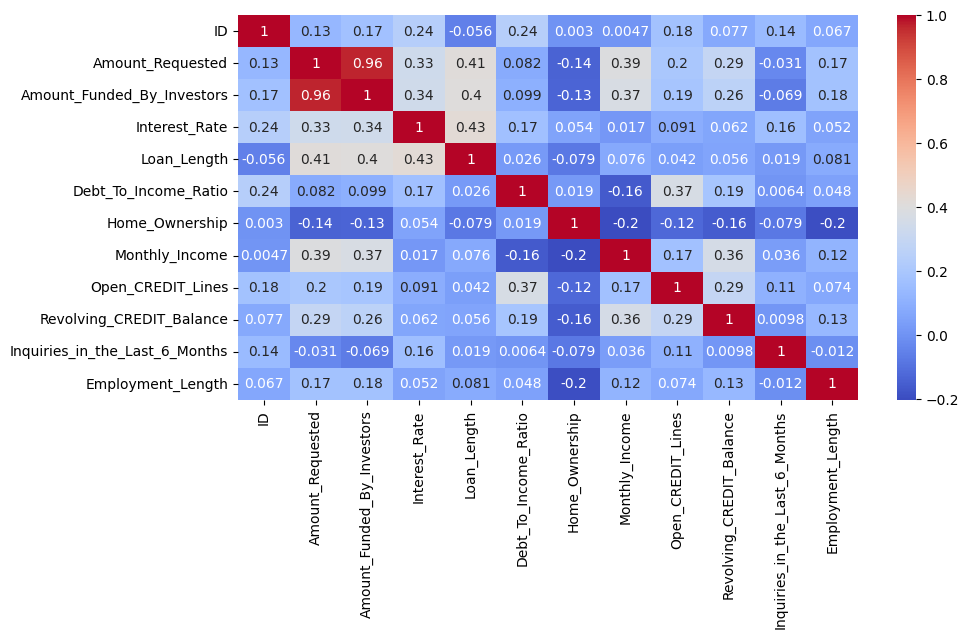

In [5]:
### WRITE YOUR CODE ###
df["Home_Ownership"] = df['Home_Ownership'].map({'MORTGAGE': 0, 'RENT': 1, 'OWN': 2})
correlation_matrix = df.corr()

# Create a new figure with a specified size
plt.figure(figsize=(10,5))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


## Model Evaluation (15 pts)

Separate the data into features and labels.

Convert the string features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [6]:
#seperate the data into features and labels
### WRITE YOUR CODE ###


features = df.drop(columns = ["Interest_Rate"])
labels = df["Interest_Rate"]

Split the data into training and test data. You could use a ratio of 80/20.

In [7]:
### WRITE YOUR CODE ###

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Train a linear regression model on and report the MSE and R2 score on the training data.

In [8]:
# Train a linear regression model and predict
### WRITE YOUR CODE ###

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             confusion_matrix, accuracy_score)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression().fit(features_train, labels_train)
label_prediction = reg.predict(features_train)

# Calculate the Mean Squared Error (MSE) and R2 score on training data
### WRITE YOUR CODE ###

mse = mean_squared_error(labels_train, label_prediction)
r2_train = r2_score(labels_train, label_prediction)

# Print the MSE and R2 score on training data
### WRITE YOUR CODE ###
print("Mean Squared Error:", mse)
print("R2 Score (Training):", r2_train)

Mean Squared Error: 0.0011736070706529977
R2 Score (Training): 0.30585613043947135


Run the model on test data and report the MSE and R2 score.

In [9]:
# Predict the target variable on the test data
### WRITE YOUR CODE ###

reg = LinearRegression().fit(features_test, labels_test)
label_prediction = reg.predict(features_test)

# Calculate the Mean Squared Error (MSE) and R2 score on the test data
### WRITE YOUR CODE ###

mse = mean_squared_error(labels_test, label_prediction)
r2_train = r2_score(labels_test, label_prediction)

# Print the MSE and R2 score on the test data
### WRITE YOUR CODE ###
print("Mean Squared Error:", mse)
print("R2 Score (Test):", r2_train)

Mean Squared Error: 0.0011538536468685056
R2 Score (Test): 0.34307255194113906


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Retrieve linear regressor metrics to print later on 
### WRITE YOUR CODE ###

poly_features = PolynomialFeatures(degree=2)
features_train_poly = poly_features.fit_transform(features_train)
reg_poly = LinearRegression()
reg_poly.fit(features_train_poly, labels_train)

# Polynomial Regression or some other model 
### WRITE YOUR CODE ###


label_prediction_train_poly = reg_poly.predict(features_train_poly)
mse_train_poly = mean_squared_error(labels_train, label_prediction_train_poly)
r2_train_poly = r2_score(labels_train, label_prediction_train_poly)


features_test_poly = poly_features.transform(features_test)
label_prediction_test_poly = reg_poly.predict(features_test_poly)
mse_test_poly = mean_squared_error(labels_test, label_prediction_test_poly)
r2_test_poly = r2_score(labels_test, label_prediction_test_poly)


# Print the results
### WRITE YOUR CODE ###

print("Mean Squared Error (Training):", mse_train_poly)
print("R2 Score (Training):", r2_train_poly)

print("Mean Squared Error (Test):", mse_test_poly)
print("R2 Score (Test):", r2_test_poly)


Mean Squared Error (Training): 0.0010471061535492368
R2 Score (Training): 0.38067660340450105
Mean Squared Error (Test): 0.001259688123842672
R2 Score (Test): 0.28281744674303033


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

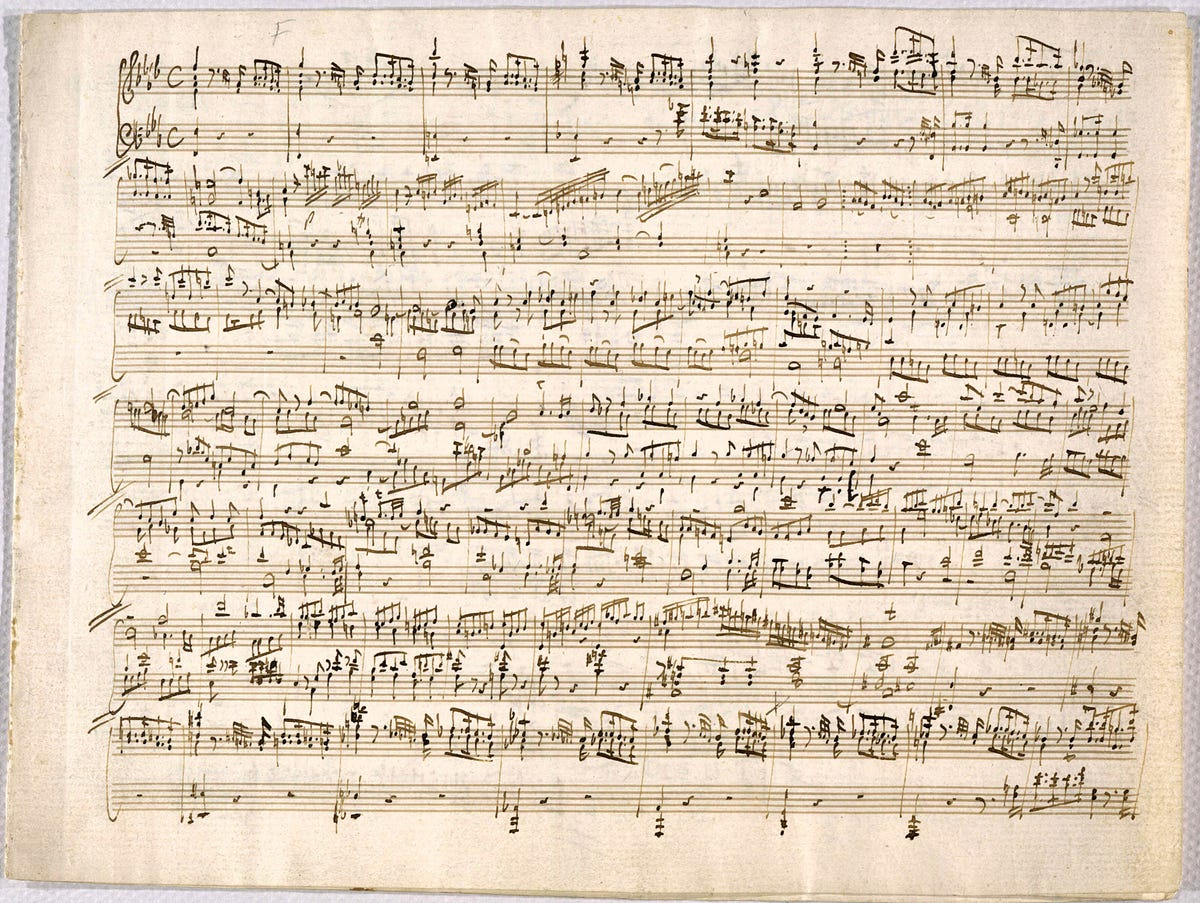

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [ ]:
!pip install pretty_midi

In [13]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

Do not delete this function. We will use this function to extract the values we have talked before.

In [14]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [15]:
def createComposersDictionary(root_path):
  composers = {}

  # Extract notes and velocities of each song and 
  # store them in a dictionary with composer names as keys
  # Write a code to bypass corrupted files and print the filenames of the corrupted files

  ### WRITE YOUR CODE ###
  for root, dirs, files in os.walk(root_path):
    for filename in files:
        file_path = os.path.join(root, filename)
        try:
            directory_name = os.path.basename(root)  # Get the directory name
            if directory_name in composers:
                composers[directory_name].append(extractNotesAndVelocities(file_path))
            else:
                composers[directory_name] = [extractNotesAndVelocities(file_path)]
        except:
            print(os.path.basename(file_path))
  ########################

  return composers

path = "C:\Repositories\CS210\Homework_3\musicnet_midis"
composers = createComposersDictionary(path)
composers["Bach"]

c:\Users\koezgen\AppData\Local\Programs\Python\Python310\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


2194_prelude13.mid
2211_fugue12.mid
2227_fugue6.mid
2230_prelude20.mid
2292_prelude19.mid
2305_prelude14.mid
2310_prelude15.mid


[(array([88., 87., 88., ..., 59., 64., 71.]),
  array([100., 100., 100., ..., 100., 100., 100.])),
 (array([71., 64., 73., 69., 69., 71., 73., 75., 76., 68., 71., 76., 76.,
         75., 76., 66., 68., 69., 71., 73., 69., 71., 69., 68., 66., 68.,
         64., 80., 76., 78., 75., 71., 73., 75., 76., 78., 81., 80., 76.,
         71., 75., 76., 78., 80., 83., 78., 75., 71., 73., 75., 76., 78.,
         81., 80., 76., 71., 75., 76., 78., 80., 83., 76., 75., 73., 75.,
         76., 75., 73., 71., 70., 68., 66., 68., 70., 71., 73., 75., 76.,
         75., 73., 75., 76., 75., 73., 71., 70., 68., 66., 68., 70., 71.,
         73., 76., 75., 73., 71., 73., 75., 76., 78., 69., 68., 71., 76.,
         75., 76., 82., 83., 73., 64., 75., 73., 71., 66., 73., 71., 70.,
         71., 66., 63., 66., 59., 71., 64., 73., 69., 69., 71., 73., 75.,
         76., 68., 71., 76., 76., 75., 76., 66., 68., 69., 71., 73., 69.,
         71., 69., 68., 66., 68., 64., 80., 76., 78., 75., 71., 73., 75.,
         76.,

## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [16]:
composers_names_to_index = {"Bach": 0, "Beethoven": 1, "Mozart": 2, "Schubert": 3}

In [17]:
updated_composers = {}
for composer in composers:
    if composer in composers_names_to_index:
        updated_key = composers_names_to_index[composer]
        updated_composers[updated_key] = composers[composer]
    else:
        updated_composers[composer] = composers[composer]

composers = updated_composers

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [18]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  for i in range(len(notes_and_velocities)):

    ### WRITE YOUR CODE ###
    # Bypass the songs with less than 400 notes
    # Bypass the songs with less than 400 notes
    if len(notes_and_velocities[i][0]) < fixed_size:
      continue
    else:
            music = []
            speed = []
            for note in range(fixed_size):
                music.append(notes_and_velocities[i][0][note])
                speed.append(notes_and_velocities[i][1][note])
            # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors
            notes.append(np.mean(music))
            velocities.append(np.mean(speed))
            # Extract then store the composer names of each 400 sized vectors
            labels.append(composer)
            # Extract then store the features(notes and velocities) of each 400 sized vectors
            music_and_speed = np.vstack((music, speed))
            # Flatten the array before storing
            array = music_and_speed.flatten()
            features.append(array)
    ########################

labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)

# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

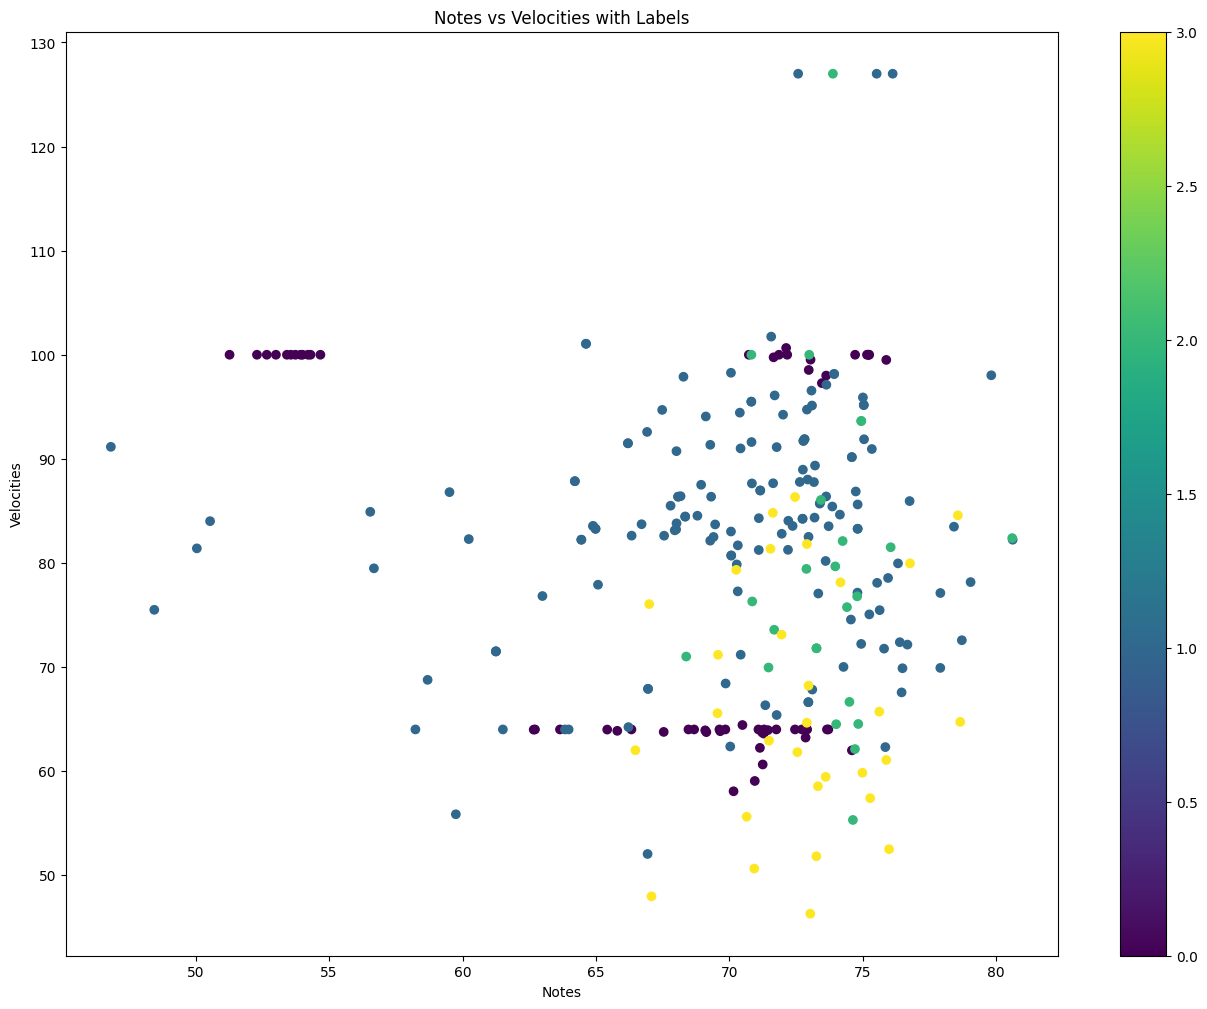

In [19]:
### WRITE YOUR CODE ###

fig = plt.figure(figsize=(16, 12))
plt.scatter(notes, velocities, c=labels)

plt.xlabel("Notes")
plt.ylabel("Velocities")
plt.title("Notes vs Velocities with Labels")

plt.colorbar()

plt.show()

## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [20]:
### WRITE YOUR CODE ###

print("Size of features is:")
print(len(features))

print("Size of features is:")
print(len(labels))

Size of features is:
270
Size of features is:
270


## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [21]:
### WRITE YOUR CODE ###

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

# We must use a RANDOM FOREST CLASSIFIER.

Train the model(2pts)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(features_train, labels_train)

RandomForestClassifier(random_state=42)

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [23]:
### WRITE YOUR CODE ###
from sklearn.metrics import f1_score

labels_pred = rfc.predict(features_test)
accuracy = accuracy_score(labels_test, labels_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
f1 = f1_score(labels_test, labels_pred, average='micro')
print(f'F1 Score: {f1:.2f}')

Accuracy: 87.04%
F1 Score: 0.87
